In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy
import os
import math
import random
import pandas as pd
from tabulate import tabulate
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [3]:
def norm_mel(y, sr):
    mel = librosa.feature.melspectrogram(y, sr = sr, n_mels = 80)
    return np.log10(np.maximum(mel, 1e-10)).T

def plot(y, sr):
    mel = norm_mel(y, sr)
    fig, axs = plt.subplots(2, figsize=(10, 8))
    axs[0].plot(y)
    im = axs[1].imshow(np.rot90(mel), aspect='auto', interpolation='none')
    fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=axs[1])
    plt.show()

def remove_pause(y, sr):
    # convert y from float to int
    y = (np.rint(y)).astype(int)
    audio = AudioSegment(y.tobytes(), frame_rate=sr, sample_width=y.dtype.itemsize, channels=1)
    audio_chunks = split_on_silence(audio, min_silence_len=200, silence_thresh=-30, keep_silence=100)
    y_ = sum(audio_chunks)
    y_ = np.array(y_.get_array_of_samples())
    y_ = y_.astype(np.float32)


/var/folders/3_/6v23ll5n5p3f8gmnr5k266640000gn/T/ipykernel_99719/2614858214.py:2: FutureWarning: Pass y=[ 2.4617996e-04  1.4088950e-04  1.8496110e-04 ... -1.2475507e-04
 -1.2293892e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(y, sr = sr, n_mels = 80)


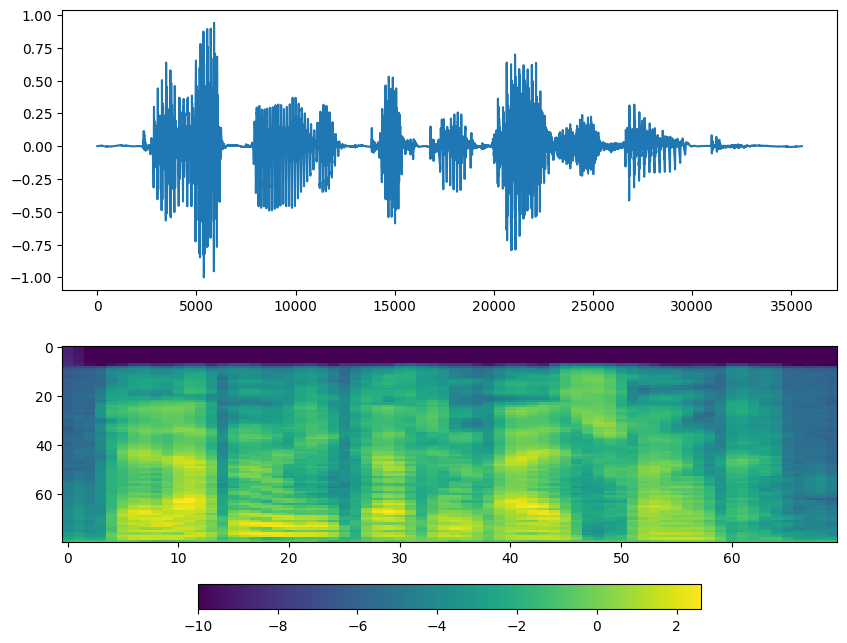

In [5]:
y, sr = librosa.load("/Users/johannes/repos/sa-hs-lb-jb/code/noice-reduction/audio-data/03a01N.wav")
plot(y, sr)